In [ ]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display

water = np.array([[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
X2 = np.flip(water, axis=1).copy()
a = np.array(([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]]))
T = 20
p_water = 10 ** (a[0, 0] - a[0, 1] / (T + a[0, 2]))
p_dio = 10 ** (a[1, 0] - a[1, 1] / (T + a[1, 2]))
P = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
P = torch.tensor(P, requires_grad=False, dtype=torch.float32)

A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True)

x1 = torch.tensor(water, requires_grad=False, dtype=torch.float32)
x2 = torch.tensor(X2, requires_grad=False, dtype=torch.float32)

a = 0.0001

for i in range(100):
    P_pred = x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p_water + \
        x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p_dio

    loss = (P_pred - P) ** 2
    loss = loss.sum()

    loss.backward()

    with torch.no_grad():
        A -= a * A.grad

        A.grad.zero_()

In [ ]:
print('estimation A12 is:',A[1].item())
print('estimation A21 is:',A[1].item())
print('final loss is:',loss.data.numpy())

estimation A12 is: 1.7293403148651123
estimation A21 is: 1.7293403148651123
final loss is: 0.87836564


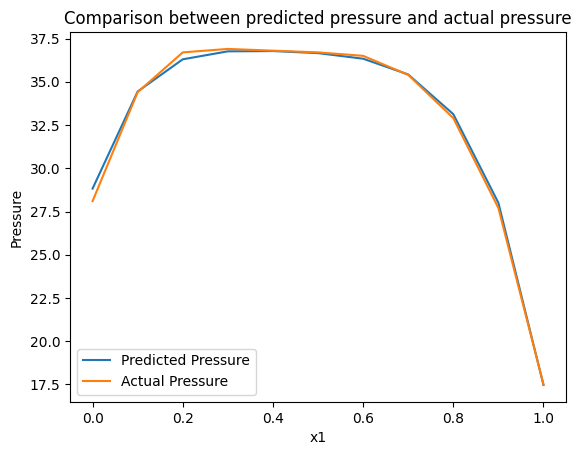

In [ ]:
import matplotlib.pyplot as plt
P_pred = P_pred.detach().numpy()[0]
P = P.detach().numpy()[0]
x1 = x1.detach().numpy()[0]

plt.plot(x1, P_pred, label='Predicted Pressure')
plt.plot(x1, P, label='Actual Pressure')
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Comparison between predicted pressure and actual pressure')
plt.show()